# Capítulo 10: Algoritmos No Supervisados en Machine Learning

---

### 10.1

---

### 10.2.

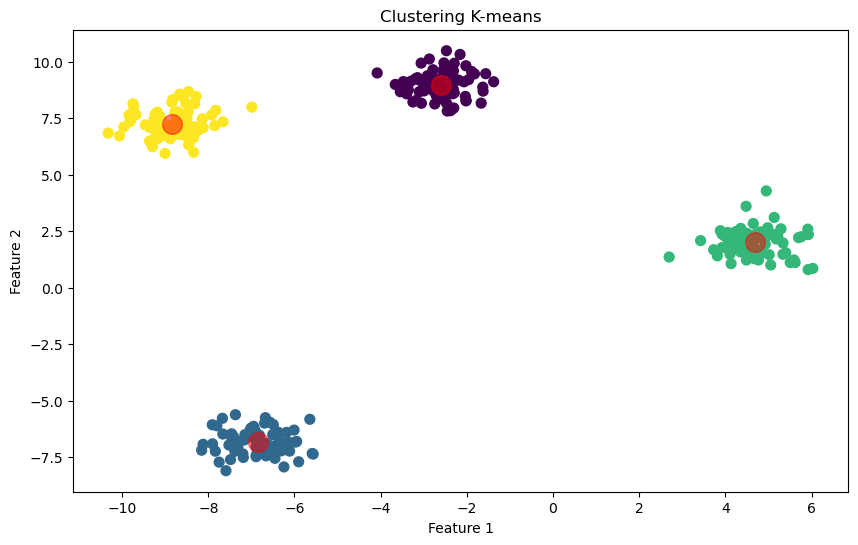

Centroides (coordinates of the cluster centers):
[[-2.60516878  8.99280115]
 [-6.85126211 -6.85031833]
 [ 4.68687447  2.01434593]
 [-8.83456141  7.24430734]]


In [1]:
# Ejercicio 1
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

import warnings

warnings.filterwarnings("ignore")

# Generar un conjunto de datos sintético
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Aplicar K-means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Visualizar los clusters y sus centros
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap="viridis")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="red", s=200, alpha=0.5)
plt.title("Clustering K-means")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Imprimir los centroides
print("Centroides (coordinates of the cluster centers):")
print(centers)

### 10.3.

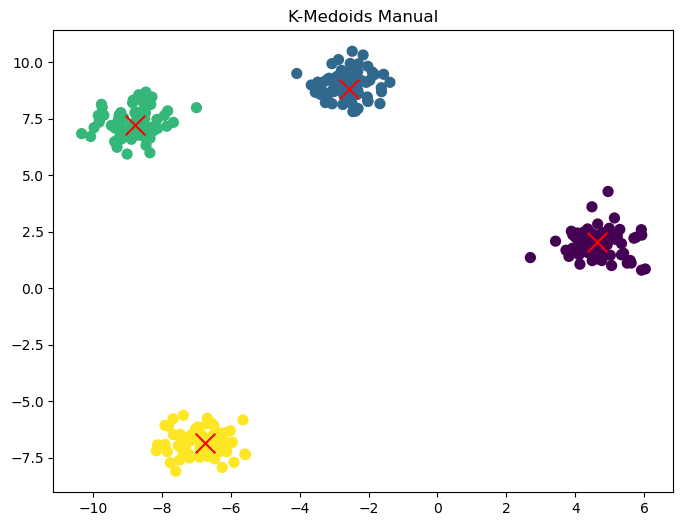

Medoids (índices): [237 201 180 121]
 - índice 237: [4.62733788 2.04356611]
 - índice 201: [-2.57858659  8.83362391]
 - índice 180: [-8.78637388  7.23011657]
 - índice 121: [-6.7451717  -6.87255415]


In [ ]:
# Ejercicio 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin, pairwise_distances

def kmedoids(X, n_clusters, max_iter=300):
    # 1) inicializa medoids al azar
    m = X.shape[0]
    medoid_idxs = np.random.choice(m, n_clusters, replace=False)
    for _ in range(max_iter):
        # 2) asigna cada punto al medoid más cercano
        labels = pairwise_distances_argmin(X, X[medoid_idxs])
        new_medoids = np.copy(medoid_idxs)

        # 3) para cada clúster, encuentra el punto que minimiza la suma de distancias
        for k in range(n_clusters):
            cluster_pts = X[labels == k]
            if len(cluster_pts) == 0:
                continue
            distances = pairwise_distances(cluster_pts, cluster_pts).sum(axis=1)
            new_medoids[k] = np.where((X == cluster_pts[np.argmin(distances)]).all(axis=1))[0][0]

        # 4) si no cambian los medoids, rompemos
        if np.all(new_medoids == medoid_idxs):
            break
        medoid_idxs = new_medoids
    return medoid_idxs, labels

# Generar datos sintéticos
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Ejecutar k-medoids
medoids, labels = kmedoids(X, n_clusters=4)

# Visualizar
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", s=50)
plt.scatter(X[medoids, 0], X[medoids, 1], c="red", marker="x", s=200)
plt.title("K-Medoids Manual")
plt.show()

# Imprimir resultados
print("Medoids (índices):", medoids)
for idx in medoids:
    print(f" - índice {idx}: {X[idx]}")

### 10.4.

Means: [[-2.70976092  8.67199908]
 [-6.66703762 -6.84783688]
 [ 4.68236432  2.05116782]
 [-8.80038094  6.9170635 ]]
Variances: [[[ 0.31217311  0.23991842]
  [ 0.23991842  2.31887614]]

 [[ 0.95848193 -0.01347304]
  [-0.01347304  0.29424462]]

 [[ 0.3959156  -0.00250741]
  [-0.00250741  0.36923271]]

 [[ 0.43087191 -0.07062024]
  [-0.07062024  1.77179496]]]


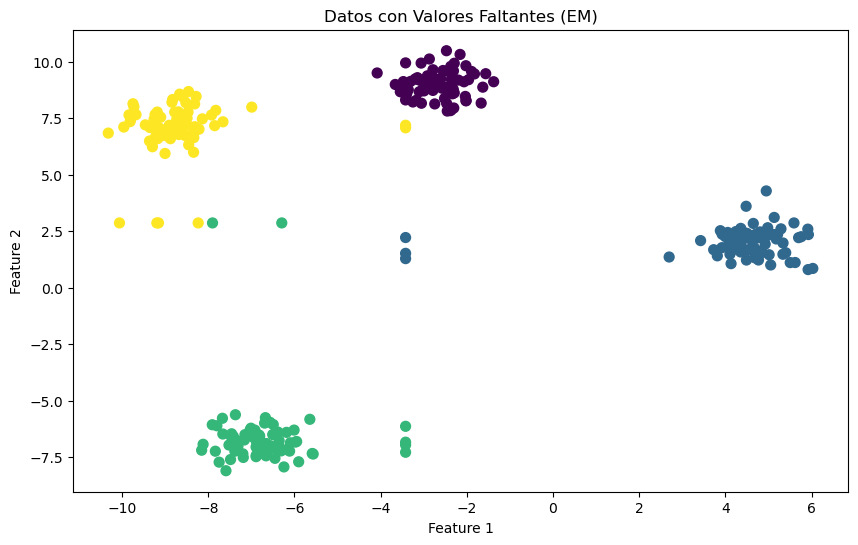

In [3]:
# Ejercicio 3
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.impute import SimpleImputer

# Generar un conjunto de datos sintético
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Introducir valores faltantes (NaN) en el conjunto de datos
X[np.random.randint(0, X.shape[0], 20), np.random.randint(0, X.shape[1], 20)] = np.nan

# Utilizar un imputador para manejar los valores NaN
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Aplicar el algoritmo Gaussian Mixture (EM)
gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(X_imputed)

# Estimar los parámetros de la mezcla gaussiana
print("Means:", gmm.means_)
print("Variances:", gmm.covariances_)

# Visualizar los datos
plt.figure(figsize=(10, 6))
plt.scatter(X_imputed[:, 0], X_imputed[:, 1], c=y_true, s=50, cmap="viridis")
plt.title("Datos con Valores Faltantes (EM)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### 10.5.

Componentes Principales (vectores propios):
[[ 0.02829152  0.93502047 -0.29798474 -0.0746003   0.05339521  0.06906571
   0.11884136  0.04342637 -0.07856551  0.02781055]
 [-0.49583139  0.15362283  0.48850087  0.22271956  0.33208505  0.54558484
  -0.17927585  0.03171447  0.03276856 -0.01230622]]

Varianza explicada por cada componente:
[0.16282981 0.11866646]


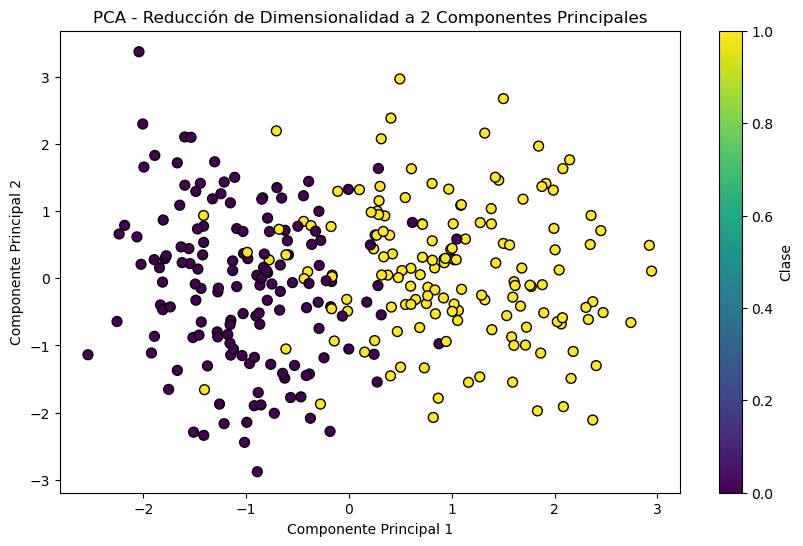

In [4]:
# Ejercicio 4
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

# Generar un conjunto de datos de alta dimensionalidad
X, y = make_classification(
    n_samples=300,
    n_features=10,
    n_classes=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42,
)

# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Imprimir los componentes principales y la varianza explicada
print("Componentes Principales (vectores propios):")
print(pca.components_)
print("\nVarianza explicada por cada componente:")
print(pca.explained_variance_ratio_)

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="viridis", edgecolor="k", s=50)
plt.title("PCA - Reducción de Dimensionalidad a 2 Componentes Principales")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label="Clase")
plt.show()

### 10.6.

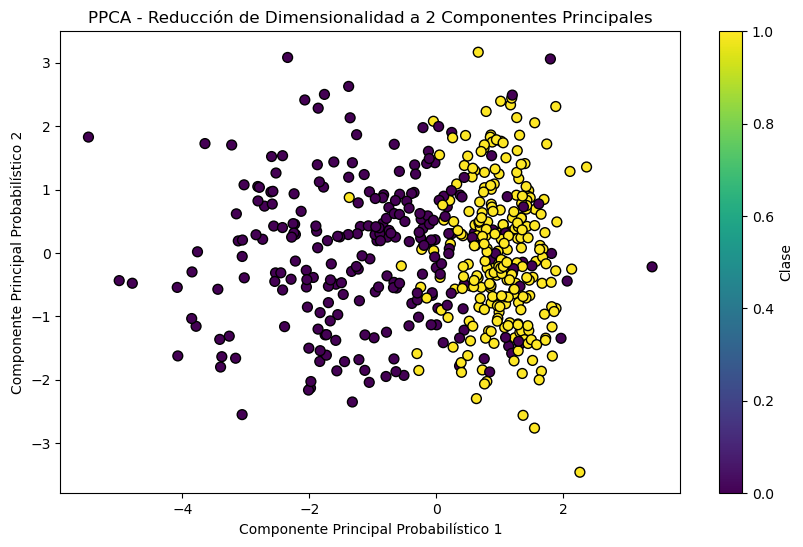

In [5]:
# Ejercicio 5
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

# Generar un conjunto de datos de alta dimensionalidad
X, y = make_classification(
    n_samples=500,
    n_features=10,
    n_classes=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42,
)

# Aplicar PCA con un enfoque probabilístico
ppca = PCA(n_components=2, svd_solver="randomized", random_state=42)
X_ppca = ppca.fit_transform(X)

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_ppca[:, 0], X_ppca[:, 1], c=y, cmap="viridis", edgecolor="k", s=50)
plt.title("PPCA - Reducción de Dimensionalidad a 2 Componentes Principales")
plt.xlabel("Componente Principal Probabilístico 1")
plt.ylabel("Componente Principal Probabilístico 2")
plt.colorbar(label="Clase")
plt.show()

### 10.7.

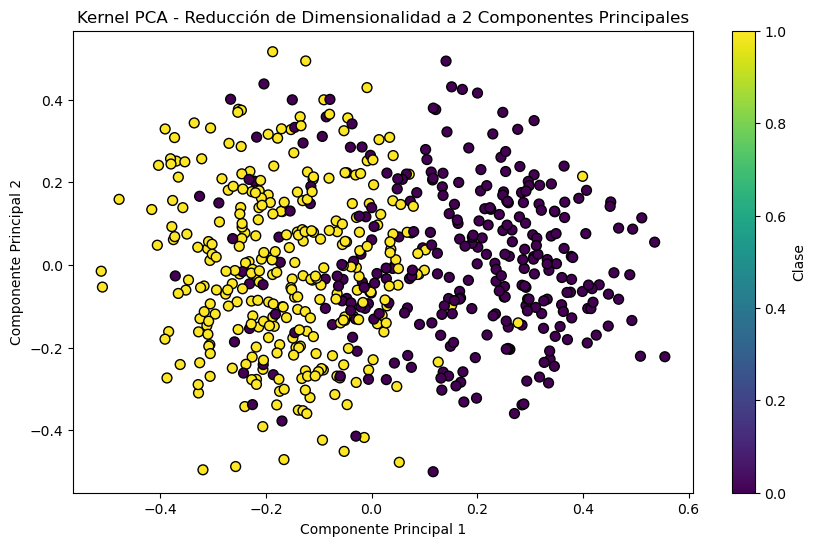

In [6]:
# Ejercicio 6
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import KernelPCA

# Generar un conjunto de datos de alta dimensionalidad
X, y = make_classification(
    n_samples=600,
    n_features=10,
    n_classes=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42,
)

# Aplicar Kernel PCA para reducir a 2 dimensiones
kernel_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.1)
X_kernel_pca = kernel_pca.fit_transform(X)

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(
    X_kernel_pca[:, 0], X_kernel_pca[:, 1], c=y, cmap="viridis", edgecolor="k", s=50
)
plt.title("Kernel PCA - Reducción de Dimensionalidad a 2 Componentes Principales")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label="Clase")
plt.show()

### 10.8.

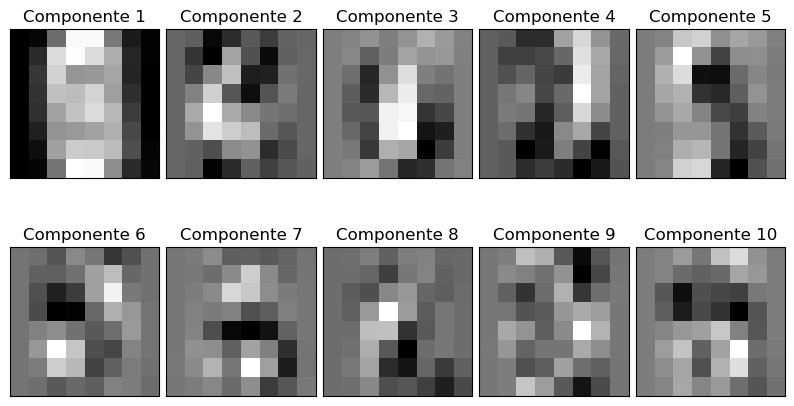

In [7]:
# Ejercicio 7
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import TruncatedSVD

# Cargar el conjunto de datos de dígitos
digits = load_digits()
X = digits.data
y = digits.target

# Aplicar SVD
svd = TruncatedSVD(n_components=10)
X_svd = svd.fit_transform(X)

# Visualizar los primeros componentes singulares
fig, axes = plt.subplots(
    2,
    5,
    figsize=(10, 5),
    subplot_kw={"xticks": [], "yticks": []},
    gridspec_kw=dict(hspace=0.3, wspace=0.05),
)
for i, ax in enumerate(axes.flat):
    ax.imshow(svd.components_[i].reshape(8, 8), cmap="gray")
    ax.set_title(f"Componente {i+1}")
plt.show()

### 10.9.

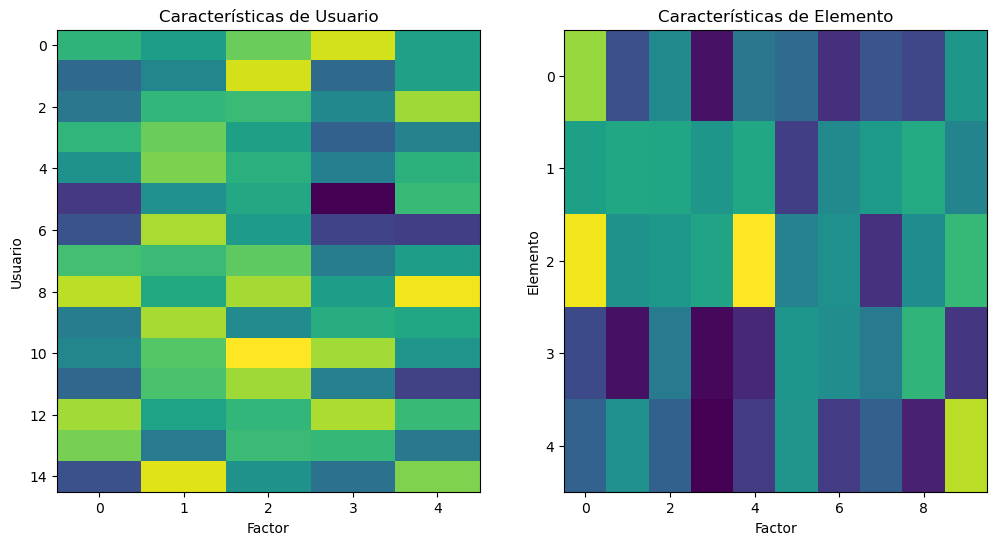

In [8]:
# Ejercicio 8
import numpy as np
import matplotlib.pyplot as plt

# Generar datos sintéticos
np.random.seed(42)
n_users, n_items = 15, 10
ratings = np.random.randint(11, size=(n_users, n_items))

# Función para factorización de matrices probabilística
def probabilistic_matrix_factorization(
    R, n_factors=5, steps=100, alpha=0.0002, beta=0.02
):
    N, M = R.shape
    P = np.random.rand(N, n_factors)
    Q = np.random.rand(M, n_factors)
    for step in range(steps):
        for i in range(N):
            for j in range(M):
                if R[i, j] > 0:
                    eij = R[i, j] - np.dot(P[i, :], Q[j, :].T)
                    P[i, :] += alpha * (2 * eij * Q[j, :] - beta * P[i, :])
                    Q[j, :] += alpha * (2 * eij * P[i, :] - beta * Q[j, :])
    return P, Q.T


# Aplicar PMF
n_factors = 5
P, Q = probabilistic_matrix_factorization(ratings, n_factors=n_factors)

# Visualización de las características de usuario y elemento
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(P, aspect="auto")
ax[0].set_title("Características de Usuario")
ax[0].set_xlabel("Factor")
ax[0].set_ylabel("Usuario")
ax[1].imshow(Q, aspect="auto")
ax[1].set_title("Características de Elemento")
ax[1].set_xlabel("Factor")
ax[1].set_ylabel("Elemento")
plt.show()

### 10.10.

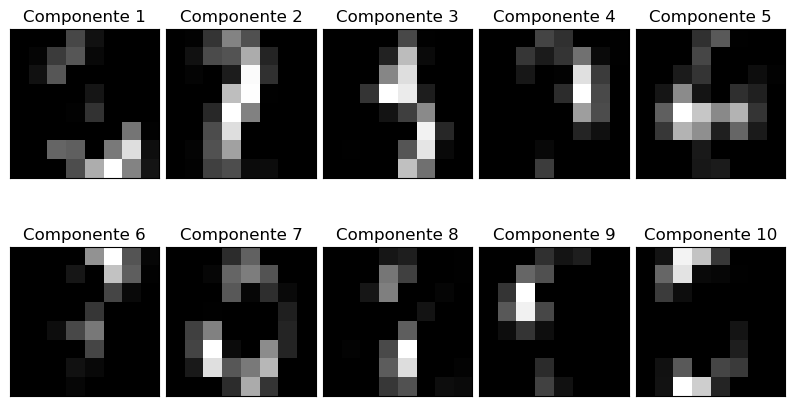

In [9]:
# Ejercicio 9
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import NMF

# Cargar el conjunto de datos de dígitos
digits = load_digits()
X = digits.data
y = digits.target

# Aplicar NMF
nmf = NMF(n_components=10, random_state=42)
X_nmf = nmf.fit_transform(X)

# Visualizar los primeros componentes de NMF
fig, axes = plt.subplots(
    2,
    5,
    figsize=(10, 5),
    subplot_kw={"xticks": [], "yticks": []},
    gridspec_kw=dict(hspace=0.3, wspace=0.05),
)
for i, ax in enumerate(axes.flat):
    ax.imshow(nmf.components_[i].reshape(8, 8), cmap="gray")
    ax.set_title(f"Componente {i+1}")
plt.show()

### 10.11.

Matriz de Transición: [[0.9   0.075 0.025]
 [0.15  0.8   0.05 ]
 [0.25  0.25  0.5  ]]


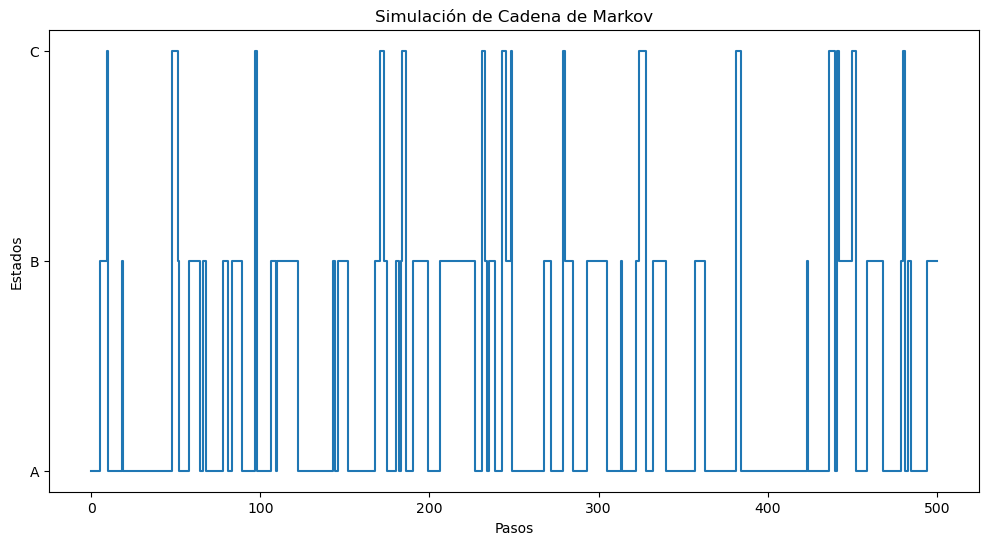

In [10]:
# Ejercicio 10
import numpy as np
import matplotlib.pyplot as plt

# Definir la matriz de transición
trans_matrix = np.array([[0.9, 0.075, 0.025], [0.15, 0.8, 0.05], [0.25, 0.25, 0.5]])

# Mapear estados a índices
state_map = {"A": 0, "B": 1, "C": 2}
inv_state_map = {v: k for k, v in state_map.items()}

# Simular transiciones en la cadena de Markov
def simulate_markov(trans_matrix, steps, start_state):
    current_state = state_map[start_state]
    states = [current_state]
    for _ in range(steps):
        current_state = np.random.choice([0, 1, 2], p=trans_matrix[current_state])
        states.append(current_state)
    return [inv_state_map[state] for state in states]


# Simulación
steps = 500
start_state = "A"  # Estado inicial A
states = simulate_markov(trans_matrix, steps, start_state)

# Visualización
print("Matriz de Transición:", trans_matrix)
plt.figure(figsize=(12, 6))
plt.plot(states, drawstyle="steps-post")
plt.title("Simulación de Cadena de Markov")
plt.xlabel("Pasos")
plt.ylabel("Estados")
plt.yticks(["A", "B", "C"])
plt.show()

### 10.12.

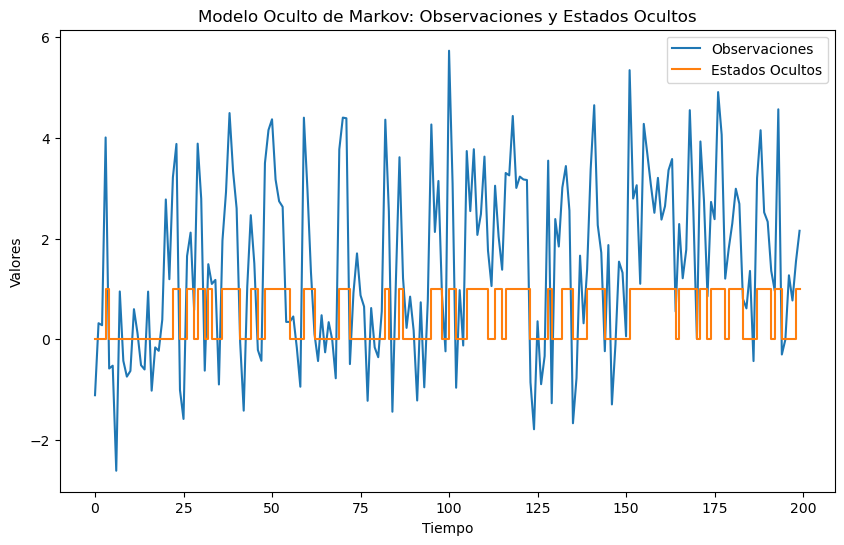

Estado inicial: 0
Estado final: 1


In [11]:
# Ejercicio 11
import numpy as np
from hmmlearn import hmm

# Definir el modelo HMM
model = hmm.GaussianHMM(n_components=2, covariance_type="full", random_state=42)

# Definir los parámetros del modelo
model.startprob_ = np.array([0.6, 0.4])  # Probabilidades de inicio
model.transmat_ = np.array([[0.7, 0.3], [0.3, 0.7]])  # Matriz de transición
model.means_ = np.array([[0.0], [3.0]])  # Medias de las distribuciones Gaussianas
model.covars_ = np.tile(np.identity(1), (2, 1, 1))  # Covarianzas

# Generar muestras
X, Z = model.sample(200)

# Visualizar las muestras y los estados
plt.figure(figsize=(10, 6))
plt.plot(X, label="Observaciones")
plt.plot(Z, label="Estados Ocultos", drawstyle="steps-post")
plt.legend()
plt.title("Modelo Oculto de Markov: Observaciones y Estados Ocultos")
plt.xlabel("Tiempo")
plt.ylabel("Valores")
plt.show()

# Imprimir estado inicial y final
print("Estado inicial:", Z[0])
print("Estado final:", Z[-1])

### 10.13.

Ranking de ítems para el usuario 5:
['Ítem 2', 'Ítem 1', 'Ítem 9', 'Ítem 5', 'Ítem 8', 'Ítem 0', 'Ítem 3', 'Ítem 6', 'Ítem 7', 'Ítem 4']


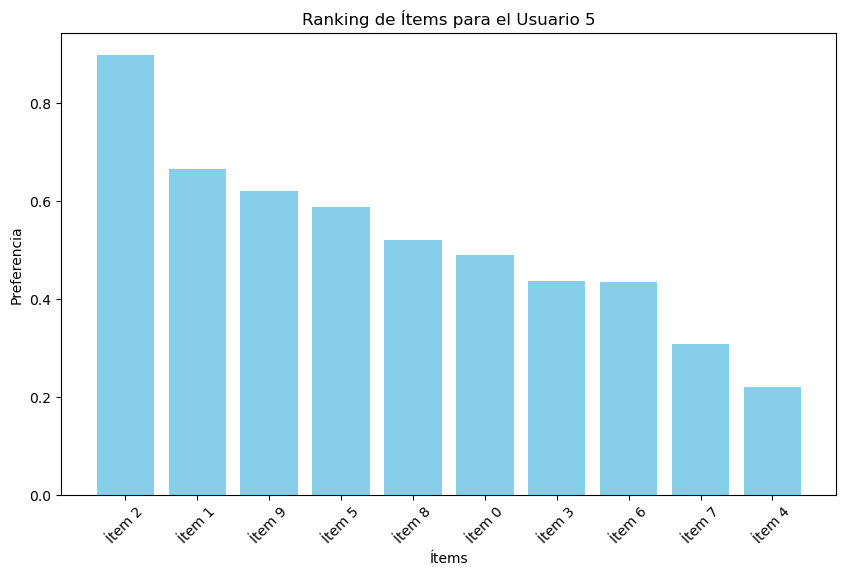

In [12]:
# Ejercicio 12
import numpy as np
import matplotlib.pyplot as plt

# Generar un conjunto de datos sintético
np.random.seed(42)
n_users = 15
n_items = 10
n_factors = 3  # Número de factores latentes

# Matrices de usuario e ítem
user_factors = np.random.rand(n_users, n_factors)
item_factors = np.random.rand(n_items, n_factors)

# Nombres de ítems
item_names = [f"Ítem {i}" for i in range(n_items)]

# Generar rankings (preferencias de usuario para ítems)
ratings = np.dot(user_factors, item_factors.T)

# Simular un escenario de ranking: Ordenar ítems para un usuario específico
user_id = 5
user_ratings = ratings[user_id]
item_ranking = np.argsort(user_ratings)[::-1]
ranked_items = [item_names[i] for i in item_ranking]
print(f"Ranking de ítems para el usuario {user_id}:")
print(ranked_items)

# Visualización del ranking para el usuario
plt.figure(figsize=(10, 6))
plt.bar(range(n_items), user_ratings[item_ranking], color="skyblue")
plt.xlabel("Ítems")
plt.ylabel("Preferencia")
plt.title(f"Ranking de Ítems para el Usuario {user_id}")
plt.xticks(range(n_items), ranked_items, rotation=45)
plt.show()

### 10.14.

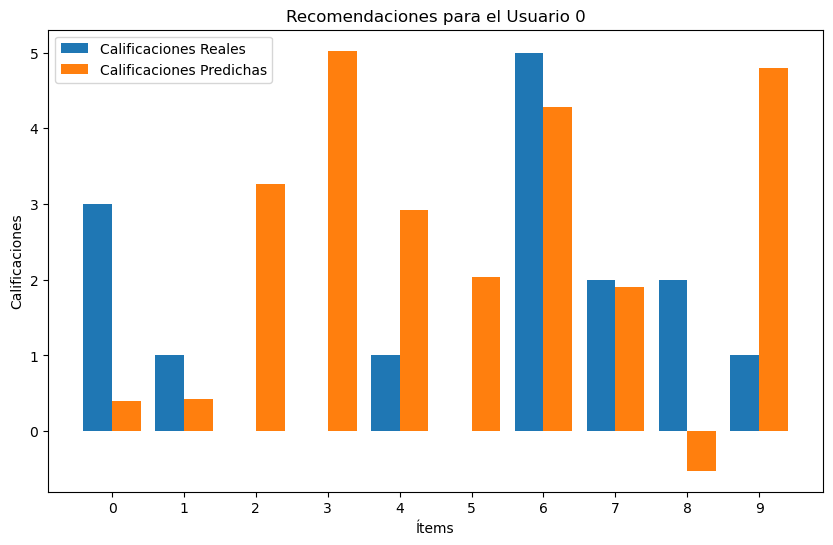

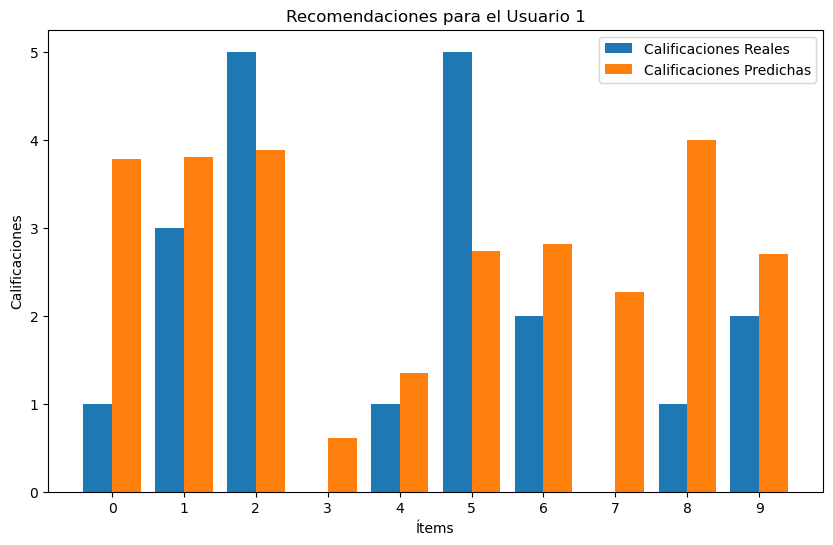

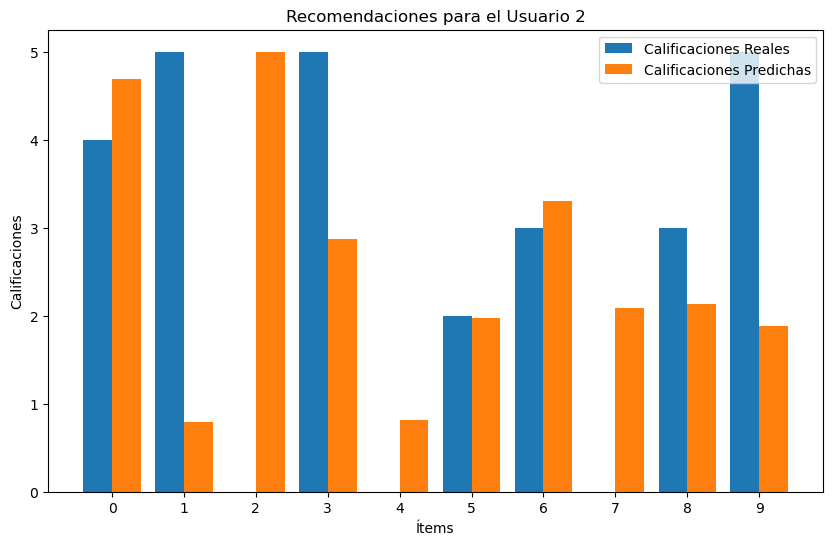

In [ ]:
# Ejercicio 13
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generar un conjunto de datos sintético de calificaciones
np.random.seed(42)
n_users = 15
n_items = 10
ratings = np.random.randint(1, 6, (n_users, n_items))

# Simular algunas calificaciones faltantes
ratings[np.random.rand(*ratings.shape) < 0.3] = 0

# Dividir los datos en entrenamiento y prueba
X_train, X_test = train_test_split(ratings, test_size=0.2, random_state=42)

# Factorización de Matrices para Filtro Colaborativo
user_profiles = np.random.rand(n_users, 3)
item_profiles = np.random.rand(n_items, 3)
for _ in range(100):
    user_profiles = np.linalg.lstsq(
        item_profiles.T.dot(item_profiles), item_profiles.T.dot(X_train.T), rcond=None
    )[0].T
    item_profiles = np.linalg.lstsq(
        user_profiles.T.dot(user_profiles), user_profiles.T.dot(X_train), rcond=None
    )[0].T

# Número de usuarios en el conjunto de prueba
num_test_users = X_test.shape[0]

# Hacer recomendaciones para los usuarios en el conjunto de prueba
for user_id in range(num_test_users):
    user_ratings = X_test[user_id, :]
    predicted_ratings = user_profiles[user_id].dot(item_profiles.T)

    # Visualizar las recomendaciones
    items = np.arange(n_items)
    plt.figure(figsize=(10, 6))
    plt.bar(
        items, user_ratings, width=0.4, label="Calificaciones Reales", align="center"
    )
    plt.bar(
        items + 0.4,
        predicted_ratings,
        width=0.4,
        label="Calificaciones Predichas",
        align="center",
    )
    plt.xlabel("Ítems")
    plt.ylabel("Calificaciones")
    plt.title(f"Recomendaciones para el Usuario {user_id}")
    plt.xticks(items + 0.2, items)
    plt.legend()
    plt.show()

### 10.15.

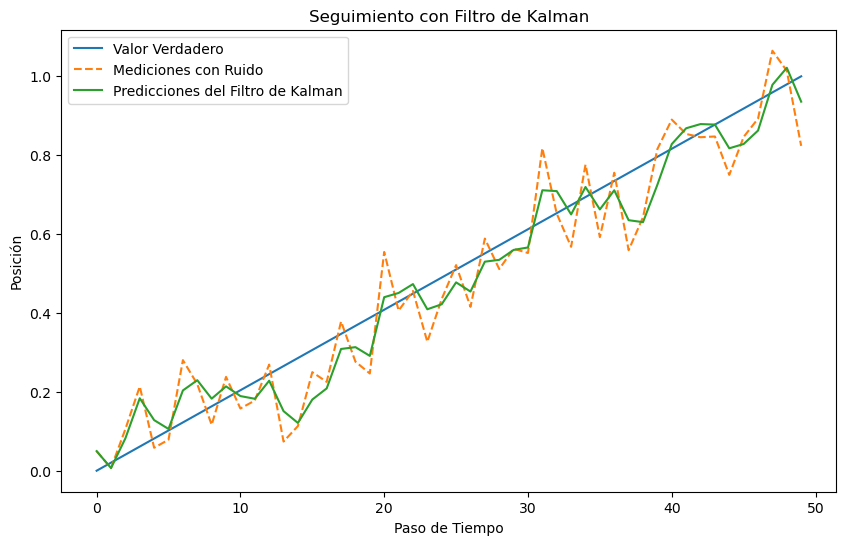

In [14]:
# Ejercicio 14
import numpy as np
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise

# Crear un Filtro de Kalman
kf = KalmanFilter(dim_x=2, dim_z=1)

# Definir la matriz de estado inicial
kf.x = np.array([0.0, 0.0])  # posición inicial y velocidad

# Definir la matriz de transición de estado
dt = 1  # intervalo de tiempo
kf.F = np.array([[1, dt], [0, 1]])

# Definir la matriz de medida
kf.H = np.array([[1.0, 0]])

# Definir la matriz de covarianza del ruido del proceso
kf.Q = Q_discrete_white_noise(dim=2, dt=dt, var=0.1)

# Definir la matriz de covarianza del ruido de medida
kf.R = np.array([[1]])

# Definir la matriz de covarianza de estado inicial
kf.P *= 1000.0

# Generar medidas con ruido
np.random.seed(42)
n_timesteps = 50
true_vals = np.linspace(0, 1, n_timesteps)
measurements = true_vals + np.random.normal(0, 0.1, n_timesteps)

# Aplicar el Filtro de Kalman a las medidas
predictions = []
for z in measurements:
    kf.predict()
    kf.update(z)
    predictions.append(kf.x[0])

# Visualización de los resultados
plt.figure(figsize=(10, 6))
plt.plot(true_vals, label="Valor Verdadero")
plt.plot(measurements, label="Mediciones con Ruido", linestyle="dashed")
plt.plot(predictions, label="Predicciones del Filtro de Kalman")
plt.xlabel("Paso de Tiempo")
plt.ylabel("Posición")
plt.title("Seguimiento con Filtro de Kalman")
plt.legend()
plt.show()

### 10.16.

Tópico 0:
sucesivamente otros documentos así del sobre texto tema documento algún


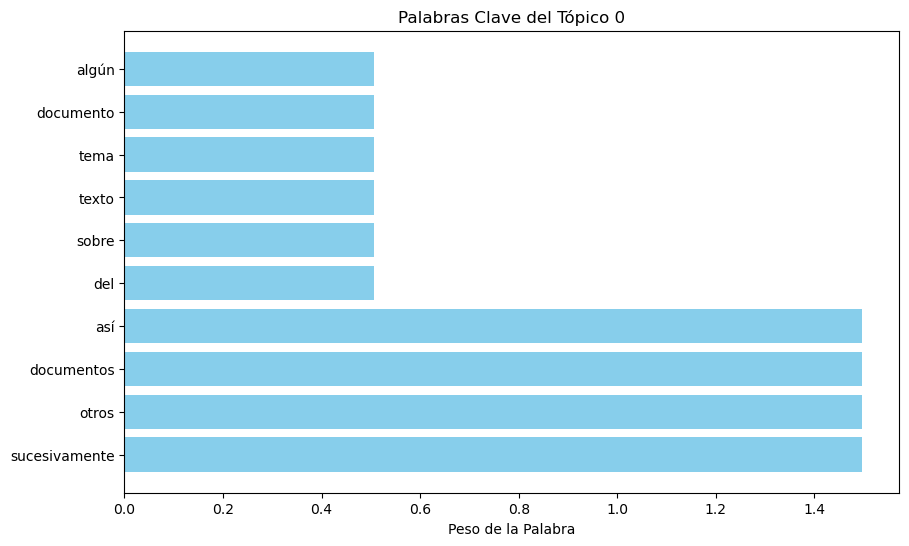

Tópico 1:
documento tema texto sobre del otro algún sucesivamente otros documentos


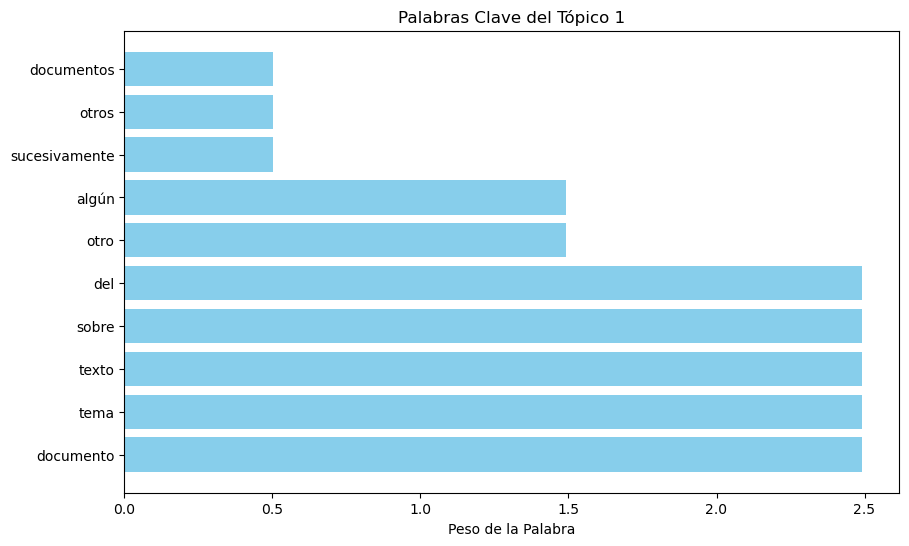

In [ ]:
# Ejercicio 15
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Ejemplo de documentos
documentos = [
    "Texto del documento 1 sobre algún tema.",
    "Texto del documento 2 sobre otro tema.",
    "Y así sucesivamente con otros documentos.",
]

# Crear un modelo de CountVectorizer
vectorizer = CountVectorizer(stop_words="english")
X = vectorizer.fit_transform(documentos)

# Crear y ajustar el modelo LDA
lda = LatentDirichletAllocation(n_components=2, random_state=0)
lda.fit(X)

# Mostrar los tópicos y visualizar la contribución de las palabras
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print("Tópico %d:" % topic_idx)
    top_words_idx = topic.argsort()[: -10 - 1 : -1]
    top_words = [feature_names[i] for i in top_words_idx]
    weights = topic[top_words_idx]
    print(" ".join(top_words))

    # Visualización
    plt.figure(figsize=(10, 6))
    plt.barh(top_words, weights, color="skyblue")
    plt.title(f"Palabras Clave del Tópico {topic_idx}")
    plt.xlabel("Peso de la Palabra")
    plt.show()

### 10.17.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step


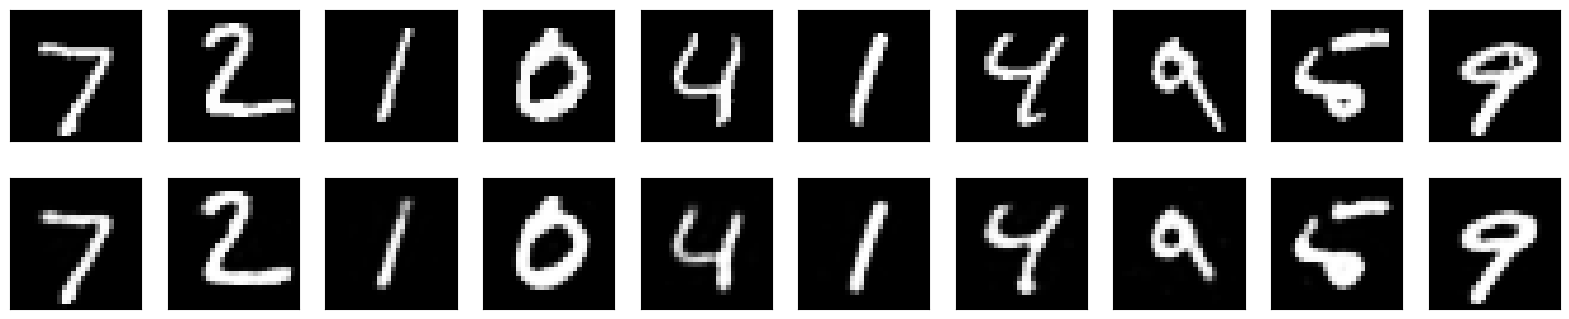

In [ ]:
# Ejercicio 16
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Cargar el conjunto de datos MNIST
(X_train, _), (X_test, _) = mnist.load_data()

# Normalizar los datos
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Aplanar las imágenes para la capa de entrada
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

# Dimensiones
input_dim = X_train.shape[1]
encoding_dim = 64  # Tamaño de la codificación

# Definir el autoencoder
autoencoder = Sequential()
autoencoder.add(Dense(encoding_dim, activation="relu", input_shape=(input_dim,)))
autoencoder.add(Dense(input_dim, activation="sigmoid"))

# Compilar el autoencoder
autoencoder.compile(optimizer=Adam(), loss="binary_crossentropy")

# Entrenar el autoencoder
autoencoder.fit(
    X_train,
    X_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(X_test, X_test),
    verbose=0,
)

# Codificar y decodificar algunas imágenes del conjunto de prueba
encoded_imgs = autoencoder.predict(X_test)
decoded_imgs = autoencoder.predict(encoded_imgs)

# Visualización de las imágenes originales y reconstruidas
n = 10  # Número de dígitos que se mostrarán
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstrucción
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### 10.18.

[BernoulliRBM] Iteration 1, pseudo-likelihood = -127.33, time = 2.51s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -111.39, time = 2.79s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -103.85, time = 2.88s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -99.32, time = 2.69s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -97.48, time = 2.91s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -96.33, time = 2.66s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -94.49, time = 2.97s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -92.81, time = 2.80s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -92.20, time = 2.36s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -91.37, time = 2.36s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -92.43, time = 2.65s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -89.96, time = 2.46s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -89.05, time = 2.77s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -89.33, time = 3.11s
[BernoulliRBM] Iteration 1

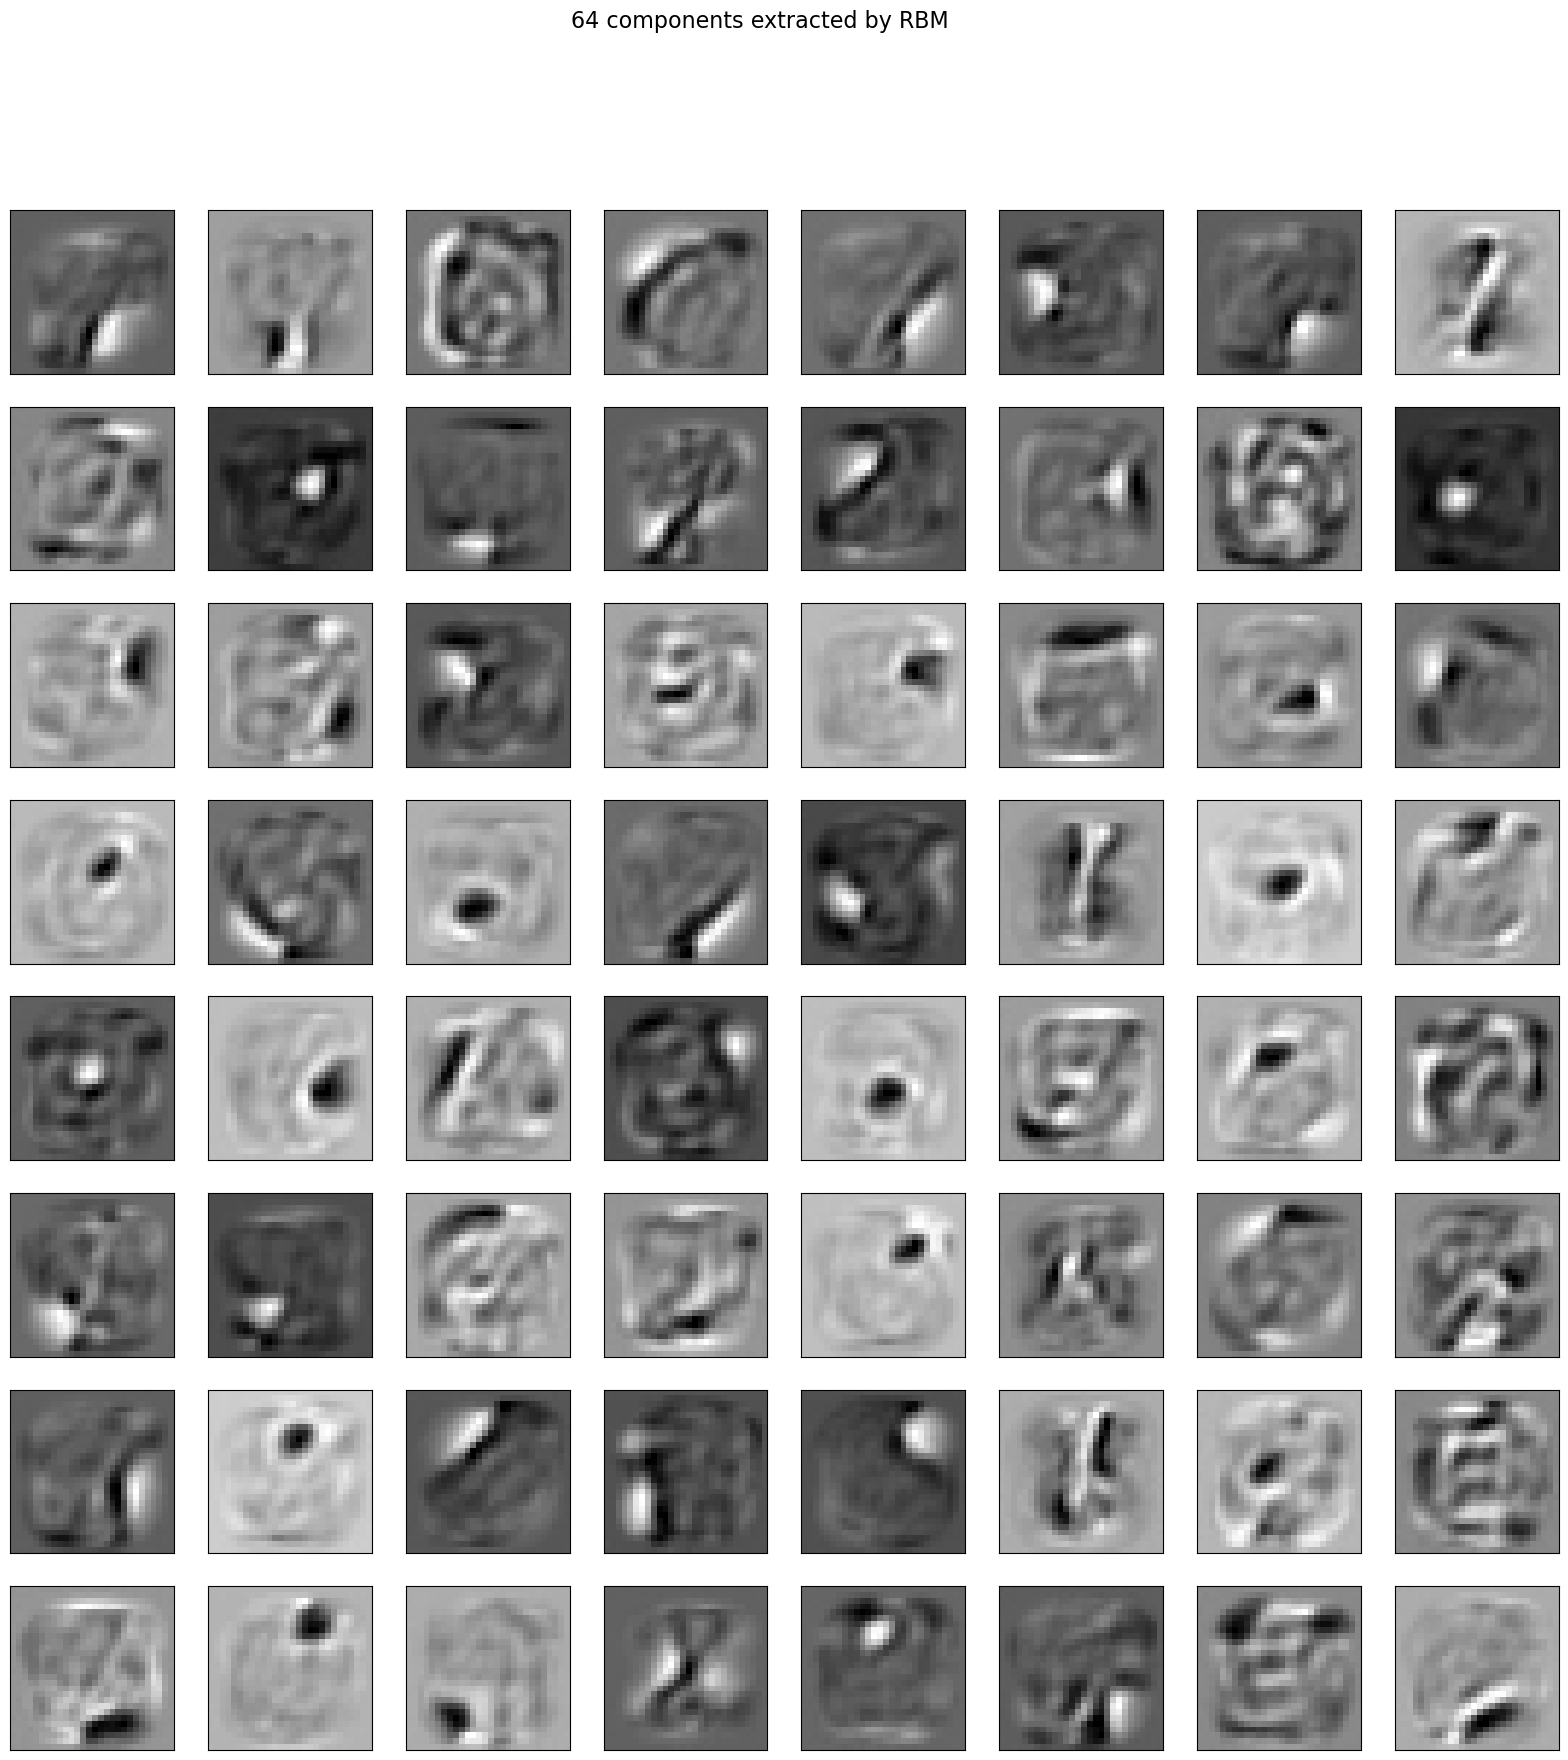

In [17]:
# Ejercicio 17
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import BernoulliRBM
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Cargar el conjunto de datos MNIST
X, y = fetch_openml("mnist_784", version=1, return_X_y=True)
X = X / 255.0  # Normalizar

# Dividir los datos en un conjunto de entrenamiento y prueba
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

# Crear y entrenar el modelo RBM
rbm = BernoulliRBM(
    n_components=64, learning_rate=0.01, n_iter=20, verbose=True, random_state=0
)
logistic = LogisticRegression(max_iter=10, solver="lbfgs", multi_class="multinomial")
classifier = Pipeline(steps=[("rbm", rbm), ("logistic", logistic)])

# Entrenar el clasificador
classifier.fit(X_train, y_train)

# Calcular la precisión del modelo
print(f"Logistic regression using RBM features:\n{classifier.score(X_test, y_test)}")

# Visualizar las características aprendidas por la RBM
plt.figure(figsize=(20, 20))
for i, comp in enumerate(rbm.components_):
    plt.subplot(8, 8, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r, interpolation="nearest")
    plt.xticks(())
    plt.yticks(())
plt.suptitle("64 components extracted by RBM", fontsize=16)
plt.show()

# FIN DEL CAPÍTULO